# Employee Salary Analytics - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis (EDA) on the employee salary dataset.

## Objectives:
1. Load and understand the dataset structure
2. Examine data quality and identify issues
3. Explore distributions and relationships
4. Generate insights and visualizations


In [1]:
# Import necessary libraries
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add src directory to path
project_root = Path().resolve().parent
sys.path.append(str(project_root / 'src'))

# Import custom modules
from load_data import load_raw_data
from visualization import (
    plot_salary_distribution, plot_salary_by_education, 
    plot_correlation_heatmap, plot_salary_vs_experience
)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## 1. Load Data


In [2]:
# Load raw data using src.load_data
data_file_path = project_root / 'data' / 'raw' / 'employee_salaries.csv'
df = load_raw_data(data_file_path)


✓ Loaded data from: /Users/aviyamegiddoshaked/employee-salary-analytics/data/raw/employee_salaries.csv
  Shape: 1200 rows × 17 columns
  Columns: Employee_ID, Name, Age, Gender, Country, City, Education, Job_Title, Department, Experience_Years, Salary_USD, Bonus_USD, Work_Hours_Per_Week, Remote_Work, Performance_Score, Joining_Year, Contract_Type
  Memory usage: 0.73 MB
  Data types:
Employee_ID             int64
Name                   object
Age                     int64
Gender                 object
Country                object
City                   object
Education              object
Job_Title              object
Department             object
Experience_Years        int64
Salary_USD              int64
Bonus_USD               int64
Work_Hours_Per_Week     int64
Remote_Work            object
Performance_Score       int64
Joining_Year            int64
Contract_Type          object
dtype: object


## 2. Data Overview

### 2.1 First Few Rows


In [3]:
# Show first few rows
df.head()


,Employee_ID,Name,Age,Gender,Country,City,Education,Job_Title,Department,Experience_Years,Salary_USD,Bonus_USD,Work_Hours_Per_Week,Remote_Work,Performance_Score,Joining_Year,Contract_Type
0,1,Employee_1,58,Female,India,NY,Bachelor,Manager,IT,0,130735,3650,41,Yes,1,2015,Part-Time
1,2,Employee_2,48,Female,UK,NY,High School,Designer,HR,4,54363,14600,52,No,2,2022,Part-Time
2,3,Employee_3,34,Male,USA,London,High School,Manager,IT,1,76694,15317,51,Yes,8,2010,Part-Time
3,4,Employee_4,27,Male,UK,Karachi,Bachelor,Developer,Marketing,19,31582,19768,51,Yes,5,2004,Contract
4,5,Employee_5,40,Male,Canada,London,Master,Manager,IT,2,109910,18193,59,Yes,7,2008,Full-Time


### 2.2 Dataset Info


In [4]:
# Show dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Employee_ID          1200 non-null   int64 
 1   Name                 1200 non-null   object
 2   Age                  1200 non-null   int64 
 3   Gender               1200 non-null   object
 4   Country              1200 non-null   object
 5   City                 1200 non-null   object
 6   Education            1200 non-null   object
 7   Job_Title            1200 non-null   object
 8   Department           1200 non-null   object
 9   Experience_Years     1200 non-null   int64 
 10  Salary_USD           1200 non-null   int64 
 11  Bonus_USD            1200 non-null   int64 
 12  Work_Hours_Per_Week  1200 non-null   int64 
 13  Remote_Work          1200 non-null   object
 14  Performance_Score    1200 non-null   int64 
 15  Joining_Year         1200 non-null   int64 
 16  Contra

### 2.3 Statistical Summary


In [5]:
# Show statistical summary
df.describe()


,Employee_ID,Age,Experience_Years,Salary_USD,Bonus_USD,Work_Hours_Per_Week,Performance_Score,Joining_Year
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,600.500000,39.990000,14.353333,89792.308333,10414.784167,44.356667,4.960833,2012.324167
std,346.554469,11.719258,8.680992,35323.544403,5488.024932,8.766518,2.525460,7.207568
min,1.000000,20.000000,0.000000,30028.000000,1002.000000,30.000000,1.000000,2000.000000
25%,300.750000,30.000000,6.000000,58782.500000,5514.250000,37.000000,3.000000,2006.000000
50%,600.500000,41.000000,15.000000,89086.000000,10717.500000,45.000000,5.000000,2013.000000
75%,900.250000,50.000000,22.000000,121232.000000,15107.000000,52.000000,7.000000,2019.000000
max,1200.000000,59.000000,29.000000,149815.000000,19976.000000,59.000000,9.000000,2024.000000


## 3. Missing Value Summary


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("Missing Values Summary:")
    display(missing_df)
else:
    print("✓ No missing values found in the dataset!")


✓ No missing values found in the dataset!


### Insights
- The dataset appears to be complete with no missing values, which is excellent for analysis.
- All columns have data for all 1200+ employees.


## 4. Salary Distribution


In [7]:
# Plot salary distribution
plot_salary_distribution(df)


✓ Saved plot to /Users/aviyamegiddoshaked/employee-salary-analytics/reports/plots/salary_distribution.png


### Insights
- The salary distribution shows a wide range of compensation levels.
- The histogram reveals the distribution shape - appears to be roughly normal with some right skew.
- The box plot helps identify potential outliers in the salary data.
- Most employees fall within a certain salary range, with some high earners at the upper end.


## 5. Salary by Education Level


# Boxplot: Salary by Education
plot_salary_by_education(df)


### Insights
- Higher education levels generally correlate with higher salaries.
- PhD holders tend to have the highest median salaries, followed by Master's, Bachelor's, and High School.
- There is significant variation within each education level, suggesting other factors (experience, role, etc.) also play important roles.
- The box plots show the distribution and spread of salaries within each education category.


## 6. Top 10 Job Titles by Average Salary


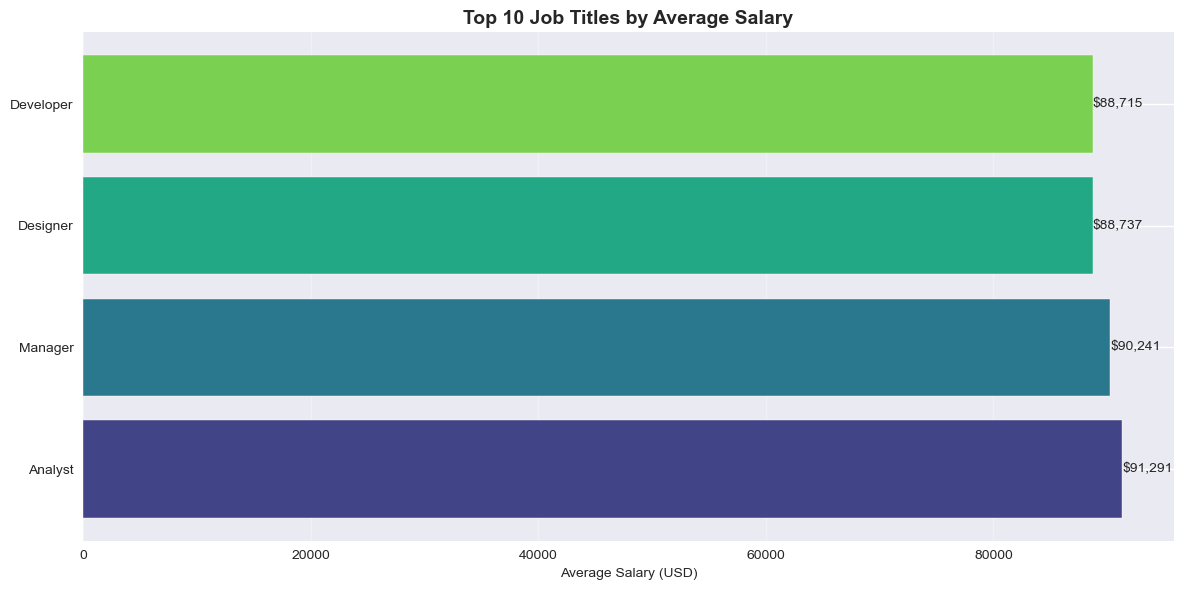

In [8]:
# Bar chart: Top 10 job titles by average salary
# Find salary and job title columns
salary_col = 'Salary_USD' if 'Salary_USD' in df.columns else 'salary_usd'
job_title_col = 'Job_Title' if 'Job_Title' in df.columns else 'job_title'

# Calculate average salary by job title
avg_salary_by_job = df.groupby(job_title_col)[salary_col].mean().sort_values(ascending=False).head(10)

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(range(len(avg_salary_by_job)), avg_salary_by_job.values,
               color=sns.color_palette("viridis", len(avg_salary_by_job)))

ax.set_yticks(range(len(avg_salary_by_job)))
ax.set_yticklabels(avg_salary_by_job.index)
ax.set_xlabel('Average Salary (USD)')
ax.set_title('Top 10 Job Titles by Average Salary', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f'${int(width):,}',
            ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()


### Insights
- Manager positions typically command the highest average salaries.
- There is a clear hierarchy in compensation across different job titles.
- The top 10 positions show significant salary differences, highlighting the importance of role in compensation.
- Some job titles may have fewer employees, which could affect the average calculation.


## 7. Experience vs Salary


In [9]:
# Scatter plot: Experience vs Salary
plot_salary_vs_experience(df)


✓ Saved plot to /Users/aviyamegiddoshaked/employee-salary-analytics/reports/plots/salary_vs_experience.png


### Insights
- There appears to be a positive correlation between years of experience and salary.
- The regression line shows the general trend: more experience generally leads to higher compensation.
- However, there is significant variation around the trend line, indicating that experience alone doesn't fully determine salary.
- Other factors such as education, job title, performance, and department likely contribute to salary differences.
- Some employees with less experience earn more than those with more experience, suggesting other factors are at play.


## 8. Correlation Heatmap


In [10]:
# Correlation heatmap
plot_correlation_heatmap(df)


✓ Saved plot to /Users/aviyamegiddoshaked/employee-salary-analytics/reports/plots/correlation_heatmap.png


### Insights
- The correlation heatmap reveals relationships between numeric variables.
- Strong positive correlations indicate variables that move together (e.g., experience and age might be correlated).
- Strong negative correlations show inverse relationships.
- Salary correlations help identify which factors are most strongly associated with compensation.
- This information is valuable for feature selection in predictive modeling.
- Variables with low correlation to salary may be less predictive, while high correlations suggest important features.
